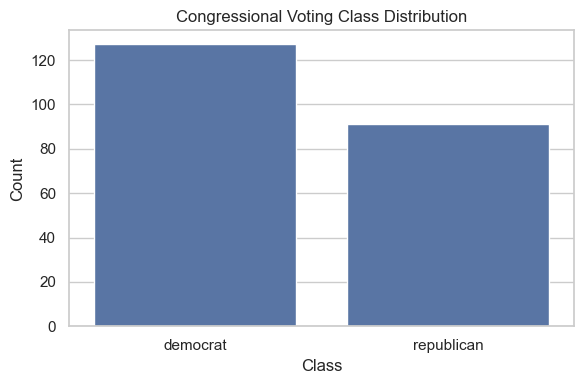

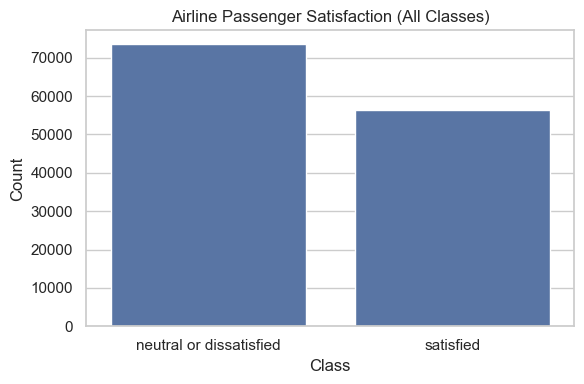

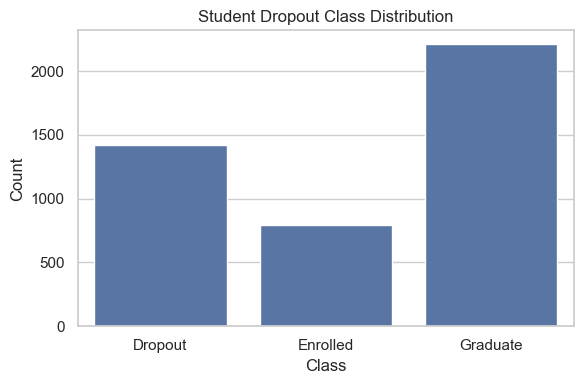


Amazon Review Class Distribution:
[Agresti] 16
[Ashbacher] 12
[Auken] 12
[Blankenship] 16
[Brody] 17
[Brown] 15
[Bukowsky] 16
[CFH] 15
[Calvinnme] 15
[Chachra] 19
[Chandler] 17
[Chell] 18
[Cholette] 16
[Comdet] 19
[Corn] 16
[Cutey] 15
[Davisson] 18
[Dent] 11
[Engineer] 12
[Goonan] 16
[Grove] 16
[Harp] 15
[Hayes] 18
[Janson] 15
[Johnson] 13
[Koenig] 12
[Kolln] 11
[Lawyeraau] 14
[Lee] 15
[Lovitt] 10
[Mahlers2nd] 15
[Mark] 14
[McKee] 14
[Merritt] 18
[Messick] 16
[Mitchell] 12
[Morrison] 14
[Neal] 16
[Nigam] 14
[Peterson] 11
[Power] 19
[Riley] 15
[Robert] 14
[Shea] 16
[Sherwin] 20
[Taylor] 12
[Vernon] 15
[Vision] 13
[Walters] 13
[Wilson] 19


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style="whitegrid")

# Helper function to plot with actual class labels
def plot_distribution(data, label_names, title):
    value_counts = data.value_counts().sort_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[label_names[i] for i in value_counts.index], y=value_counts.values)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ---------- 1. Congressional Voting ----------
df_vote = pd.read_csv('all_datasets/CongressionalVotingID.shuf.lrn.csv')
vote_encoder = LabelEncoder()
vote_labels = vote_encoder.fit_transform(df_vote["class"])
plot_distribution(pd.Series(vote_labels), vote_encoder.classes_, "Congressional Voting Class Distribution")

# ---------- 2. Airline Passenger Satisfaction (NO grouping) ----------
df_air_train = pd.read_csv('all_datasets/Airline_passenger_satiscation_train.csv')
df_air_test = pd.read_csv('all_datasets/Airline_passenger_satiscation_test.csv')
df_air = pd.concat([df_air_train, df_air_test], ignore_index=True)

# Get original string labels before encoding
air_classes = df_air["satisfaction"].unique().tolist()
air_classes_sorted = sorted(air_classes)  # Ensure consistent order

air_encoder = LabelEncoder()
df_air["satisfaction"] = air_encoder.fit_transform(df_air["satisfaction"])
plot_distribution(df_air["satisfaction"], air_encoder.classes_, "Airline Passenger Satisfaction (All Classes)")

# ---------- 3. Student Dropout ----------
df_student = pd.read_csv('all_datasets/student_droupout_data.csv', sep=";")
student_encoder = LabelEncoder()
df_student["Target"] = student_encoder.fit_transform(df_student["Target"])
plot_distribution(df_student["Target"], student_encoder.classes_, "Student Dropout Class Distribution")

# ---------- 4. Amazon Reviews (Text Output Only) ----------
df_amazon = pd.read_csv('all_datasets/amazon_review_ID.shuf.lrn.csv')
amazon_encoder = LabelEncoder()
amazon_labels = amazon_encoder.fit_transform(df_amazon["Class"])
amazon_counts = pd.Series(amazon_labels).value_counts().sort_index()

print("\nAmazon Review Class Distribution:")
for i, count in amazon_counts.items():
    print(f"[{amazon_encoder.inverse_transform([i])[0]}] {count}")
